BASIC SQL OPERATIONS IN SPARK SQL

In [7]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('tugas 1').getOrCreate()

data = [ 
    ('Erlyn', 19, 'F', 5000, 1),
    ('Abimanyu', 20, 'M', 6300, 2),
    ('Bilyn', 28, 'M', 11300, 1),
    ('Priyo', 25, 'M', 2900, 2),
    ('oshy', 21, 'F', 9900, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
# Query dasar
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) as AvgSalary FROM employees').show()

+--------+---+------+------+------+
|    Name|Age|Gender|Salary|DeptId|
+--------+---+------+------+------+
|   Erlyn| 19|     F|  5000|     1|
|Abimanyu| 20|     M|  6300|     2|
|   Bilyn| 28|     M| 11300|     1|
|   Priyo| 25|     M|  2900|     2|
|    oshy| 21|     F|  9900|     1|
+--------+---+------+------+------+

+--------+---+
|    Name|Age|
+--------+---+
|   Erlyn| 19|
|Abimanyu| 20|
|   Bilyn| 28|
|    oshy| 21|
+--------+---+

+---------+
|AvgSalary|
+---------+
|   7080.0|
+---------+



Advanced Queries for Data Analysis

In [8]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     F|       5000| 19|
|     M|       6300| 20|
|     F|       9900| 21|
|     M|       2900| 25|
|     M|      11300| 28|
+------+-----------+---+



In [9]:
spark.sql('''
SELECT DeptId, AVG(Salary) as AvgSalary
FROM employees
GROUP BY DeptId
ORDER BY DeptId
''').show()

+------+-----------------+
|DeptId|        AvgSalary|
+------+-----------------+
|     1|8733.333333333334|
|     2|           4600.0|
+------+-----------------+



In [10]:
spark.sql('''
SELECT Name, Age, Gender, Salary
FROM employees
WHERE Salary > (
    SELECT AVG(Salary)
    FROM employees e2
    WHERE e2.Gender = employees.Gender
)
''').show()

+-----+---+------+------+
| Name|Age|Gender|Salary|
+-----+---+------+------+
|Bilyn| 28|     M| 11300|
| oshy| 21|     F|  9900|
+-----+---+------+------+



In [11]:
spark.sql('''
SELECT Name, DeptId, Salary,
       DENSE_RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
ORDER BY DeptId, Rank
''').show()

+--------+------+------+----+
|    Name|DeptId|Salary|Rank|
+--------+------+------+----+
|   Bilyn|     1| 11300|   1|
|    oshy|     1|  9900|   2|
|   Erlyn|     1|  5000|   3|
|Abimanyu|     2|  6300|   1|
|   Priyo|     2|  2900|   2|
+--------+------+------+----+



Penggunaan Window Functions dan Subqueries

In [12]:
spark.sql('''
SELECT Name, Age, Salary,ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) AS RankByAge
FROM employees
''').show()


[Stage 54:>                                                         (0 + 8) / 8]

+--------+---+------+---------+
|    Name|Age|Salary|RankByAge|
+--------+---+------+---------+
|   Erlyn| 19|  5000|        1|
|Abimanyu| 20|  6300|        1|
|    oshy| 21|  9900|        1|
|   Priyo| 25|  2900|        1|
|   Bilyn| 28| 11300|        1|
+--------+---+------+---------+



Advanced Spark SQL Queries

In [14]:
from pyspark.sql import SparkSession

# Membuat SparkSession
spark = SparkSession.builder.appName('tugas 4').getOrCreate()

# Data setup untuk tabel-tabel 
employees = spark.createDataFrame([
    ('Erlyn', 19, 'F', 5000, 1),
    ('Abimanyu', 20, 'M', 6300, 2),
    ('Bilyn', 28, 'M', 11300, 1),
    ('Priyo', 25, 'M', 2900, 2),
    ('oshy', 21, 'F', 9900, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')
# Query kompleks: JOIN antar tabel 
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+--------+---+---------+-----------+
|    Name|Age| DeptName|ProjectName|
+--------+---+---------+-----------+
|    oshy| 21|       HR|  Project A|
|   Bilyn| 28|       HR|  Project A|
|   Erlyn| 19|       HR|  Project A|
|   Priyo| 25|Marketing|  Project B|
|Abimanyu| 20|Marketing|  Project B|
+--------+---+---------+-----------+



In [15]:
spark.sql('''
SELECT 
    e.Name,
    e.DeptId,
    d.DeptName,
    e.Salary,
    AVG(e.Salary) OVER (PARTITION BY e.DeptId) AS AvgSalaryDept,
    DENSE_RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS RankDalamDept
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY e.DeptId, RankDalamDept
''').show()

+--------+------+---------+------+-----------------+-------------+
|    Name|DeptId| DeptName|Salary|    AvgSalaryDept|RankDalamDept|
+--------+------+---------+------+-----------------+-------------+
|   Bilyn|     1|       HR| 11300|8733.333333333334|            1|
|    oshy|     1|       HR|  9900|8733.333333333334|            2|
|   Erlyn|     1|       HR|  5000|8733.333333333334|            3|
|Abimanyu|     2|Marketing|  6300|           4600.0|            1|
|   Priyo|     2|Marketing|  2900|           4600.0|            2|
+--------+------+---------+------+-----------------+-------------+



In [17]:
spark.sql('''
SELECT 
    e.Name, 
    e.Age, 
    d.DeptName, 
    e.Salary,
    AVG(e.Salary) OVER (PARTITION BY e.DeptId ORDER BY e.Age) AS AvgSalaryByAge,
    DENSE_RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS SalaryRank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY e.DeptId, e.Age
''').show()

[Stage 83:====>             (2 + 6) / 8][Stage 84:==>               (1 + 2) / 8]

+--------+---+---------+------+-----------------+----------+
|    Name|Age| DeptName|Salary|   AvgSalaryByAge|SalaryRank|
+--------+---+---------+------+-----------------+----------+
|   Erlyn| 19|       HR|  5000|           5000.0|         3|
|    oshy| 21|       HR|  9900|           7450.0|         2|
|   Bilyn| 28|       HR| 11300|8733.333333333334|         1|
|Abimanyu| 20|Marketing|  6300|           6300.0|         1|
|   Priyo| 25|Marketing|  2900|           4600.0|         2|
+--------+---+---------+------+-----------------+----------+



Advanced Data Analysis and Visualization

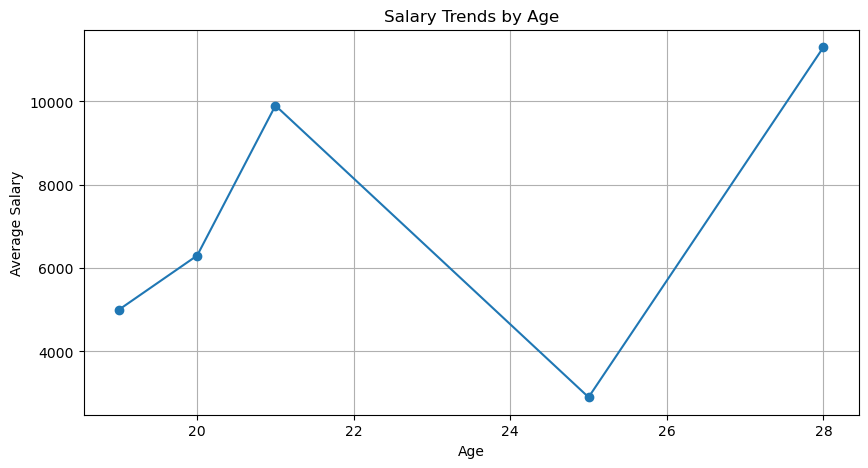

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()